In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
import speclite.filters

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs

In [2]:
import mejiro
module_path = os.path.dirname(mejiro.__file__)
filter_responses_dir = os.path.join(module_path, 'data', 'filter_responses')
# filter_response_files = sorted(glob(f'{filter_responses_dir}/*.ecsv'))

In [3]:
sca_ids = list(range(1, 19))
print(sca_ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


NB I'm not loading any of the grism or prism stuff here. I can exclude them by sorting the globbed files and selecting the first eight, which are the WFI bands

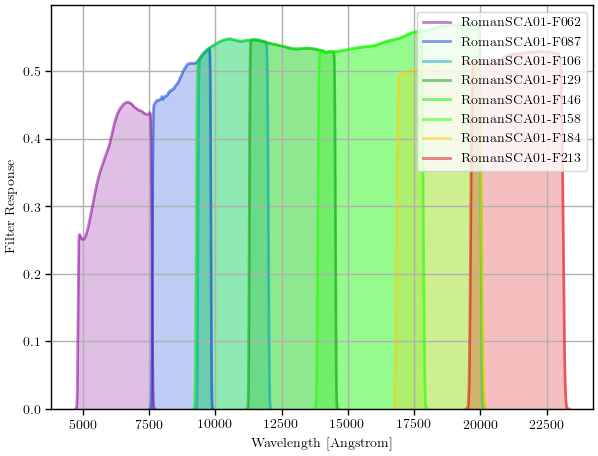

In [4]:
for sca in sca_ids:
    group_name = f'RomanSCA{str(sca).zfill(2)}'

    filter_response_files = sorted(glob(f'{filter_responses_dir}/{group_name}*.ecsv'))

    roman_filters = speclite.filters.load_filters(*filter_response_files[:8])
    speclite.filters.plot_filters(roman_filters)

    break

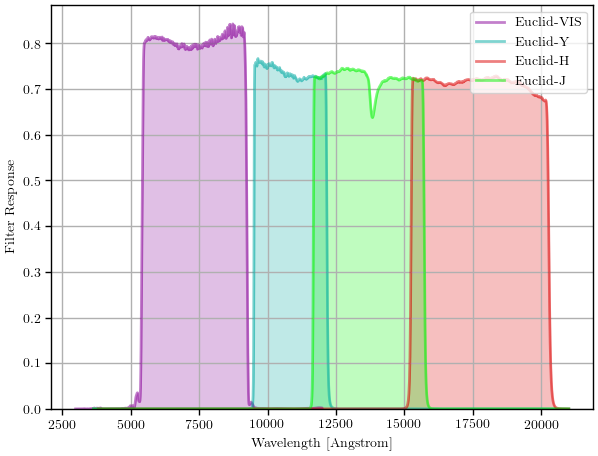

In [5]:
euclid = speclite.filters.load_filters('Euclid-VIS', 'Euclid-Y', 'Euclid-H', 'Euclid-J')
speclite.filters.plot_filters(euclid)

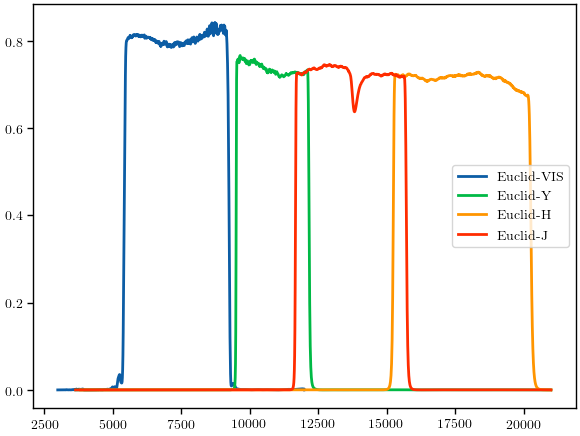

In [11]:
euclid_filters = [speclite.filters.load_filter(f) for f in euclid.names]

for filter in euclid_filters:
    plt.plot(filter.wavelength, filter.response, label=filter.name)

plt.legend()
plt.show()

see Section 6.1 of [this paper](https://www.aanda.org/articles/aa/full_html/2022/06/aa42897-21/aa42897-21.html) by the Euclid collaboration for explanation of function below

In [12]:
def get_zeropoint_magnitude(wavelength, response, effective_area=4.5 * 1e4):
    # effective area in cm^2

    # assert that wavelength values are evenly spaced
    assert np.allclose(np.diff(wavelength), np.diff(wavelength)[0])

    dv = np.diff(wavelength)[0]
    integral = 0
    for wl, resp in zip(wavelength, response):
        integral += (dv * (1 / wl) * resp)
    
    return 8.9 + (2.5 * np.log10(((effective_area * 1e-23) / (6.602 * 1e-27)) * integral))

In [14]:
for filter in euclid_filters:
    print(filter.name, get_zeropoint_magnitude(filter.wavelength, filter.response, effective_area=9.926 * 1e3))

Euclid-VIS 25.93358266002705
Euclid-Y 24.99918892247115
Euclid-H 25.118758330632318
Euclid-J 25.18208357013242


In [15]:
filter_response_files[:8]

['/nfshome/bwedig/mejiro/mejiro/data/filter_responses/RomanSCA01-F062.ecsv',
 '/nfshome/bwedig/mejiro/mejiro/data/filter_responses/RomanSCA01-F087.ecsv',
 '/nfshome/bwedig/mejiro/mejiro/data/filter_responses/RomanSCA01-F106.ecsv',
 '/nfshome/bwedig/mejiro/mejiro/data/filter_responses/RomanSCA01-F129.ecsv',
 '/nfshome/bwedig/mejiro/mejiro/data/filter_responses/RomanSCA01-F146.ecsv',
 '/nfshome/bwedig/mejiro/mejiro/data/filter_responses/RomanSCA01-F158.ecsv',
 '/nfshome/bwedig/mejiro/mejiro/data/filter_responses/RomanSCA01-F184.ecsv',
 '/nfshome/bwedig/mejiro/mejiro/data/filter_responses/RomanSCA01-F213.ecsv']

In [17]:
roman_sca01_filters = [speclite.filters.load_filter(f) for f in filter_response_files[:8]]

for filter in roman_sca01_filters:
    print(filter.name, get_zeropoint_magnitude(filter.wavelength, filter.response))

RomanSCA01-F062 26.573720976925344
RomanSCA01-F087 26.22444439663539
RomanSCA01-F106 26.31341612265568
RomanSCA01-F129 26.31760383446462
RomanSCA01-F146 27.53675269415519
RomanSCA01-F158 26.320712182222806
RomanSCA01-F184 25.852803745658825
RomanSCA01-F213 25.81314064968742
